We're going to take the following approach:

- Problem definition
- Data
- Evaluation
- Features
- Modelling
- Experimentation

## 1. Problem Definition
In a statement, Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

- **age** – Age in years  
- **sex** – Biological sex  
  - `1`: Male  
  - `0`: Female  
- **cp** – Chest pain type  
  - `0`: Typical angina – chest pain related to decreased blood supply to the heart  
  - `1`: Atypical angina – chest pain not related to the heart  
  - `2`: Non-anginal pain – typically esophageal spasms (non-heart related)  
  - `3`: Asymptomatic – chest pain not showing signs of disease  
- **trestbps** – Resting blood pressure (in mm Hg on admission to the hospital)  
  - Anything above 130–140 is typically cause for concern  
- **chol** – Serum cholesterol in mg/dl  
  - Calculated as: `serum = LDL + HDL + 0.2 * triglycerides`  
  - Above 200 is a cause for concern  
- **fbs** – Fasting blood sugar > 120 mg/dl  
  - `1`: True  
  - `0`: False  
  - `>126 mg/dL` signals diabetes  
- **restecg** – Resting electrocardiographic results  
  - `0`: Nothing to note  
  - `1`: ST-T Wave abnormality  
    - Can range from mild symptoms to severe problems  
    - Signals non-normal heartbeat  
  - `2`: Possible or definite left ventricular hypertrophy  
    - Indicates an enlarged heart’s main pumping chamber  
- **thalach** – Maximum heart rate achieved  
- **exang** – Exercise-induced angina  
  - `1`: Yes  
  - `0`: No  
- **oldpeak** – ST depression induced by exercise relative to rest  
  - Measures stress of the heart during exercise  
  - Unhealthy hearts will show more stress  
- **slope** – Slope of the peak exercise ST segment  
  - `0`: Upsloping – better heart rate with exercise (uncommon)  
  - `1`: Flat – minimal change (typical of a healthy heart)  
  - `2`: Downsloping – signs of an unhealthy heart  
- **ca** – Number of major vessels (0–3) colored by fluoroscopy  
  - Colored vessel = blood flow is visible to the doctor  
  - More visible blood flow = better (indicates no clots)  
- **thal** – Thalium stress test result  
  - `1`, `3`: Normal  
  - `6`: Fixed defect – was a defect, but now resolved  
  - `7`: Reversible defect – indicates improper blood movement during exercise  
- **target** – Presence of heart disease  
  - `1`: Yes  
  - `0`: No (this is the predicted attribute)  


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

## Exploratory Data Analysis (EDA)
- The goal here is to find about explore the features and how the data is.
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how we deal with it?
4. Where are the outlier and why and how we deal with it?
5. How can we add, remove or change the provided data to get something from it?


In [5]:
data.head()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

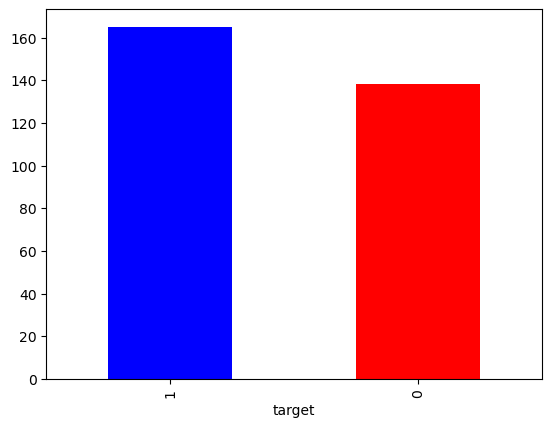

In [8]:
data.target.value_counts().plot(kind="bar", color=["blue","red"])

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

- in the above result "1" is male and "0" is female. So we have 207 record which are male and 96 records which are female.

In [11]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
import matplotlib.pyplot as plt

Age vs Max Heart Rate (Thalach)

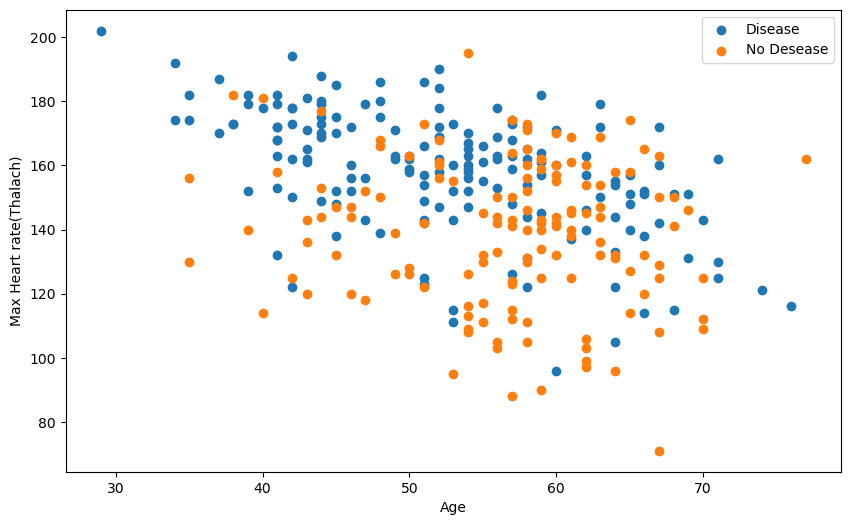

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(data.age[data.target==1], data.thalach[data.target==1])
plt.scatter(data.age[data.target==0], data.thalach[data.target==0])
plt.xlabel("Age")
plt.ylabel("Max Heart rate(Thalach)")
plt.legend(["Disease", "No Desease"])

So from the plot at somewhat we can say that person's maximum heart rate decreases as he/she age.

## Let's check the distribution of some of the features.

<Axes: ylabel='Frequency'>

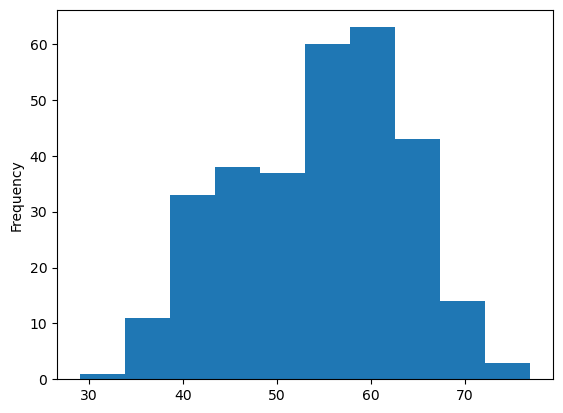

In [ ]:
data.age.plot.hist()

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='Frequency'>

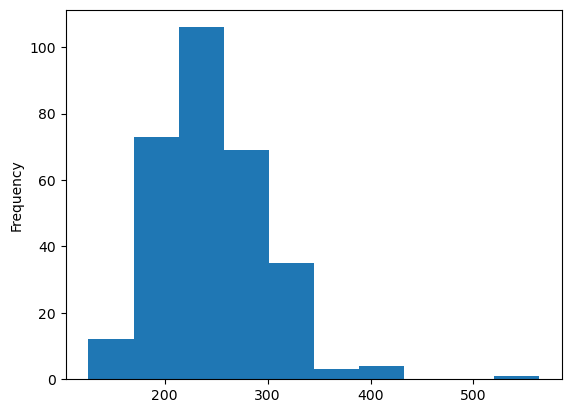

In [20]:
data.chol.plot.hist()

<Axes: ylabel='Frequency'>

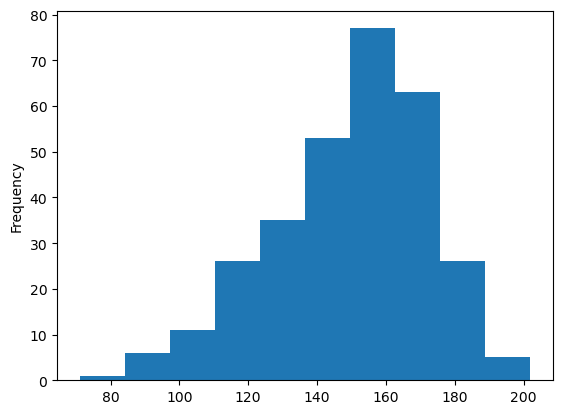

In [21]:
data.thalach.plot.hist()

<Axes: ylabel='Frequency'>

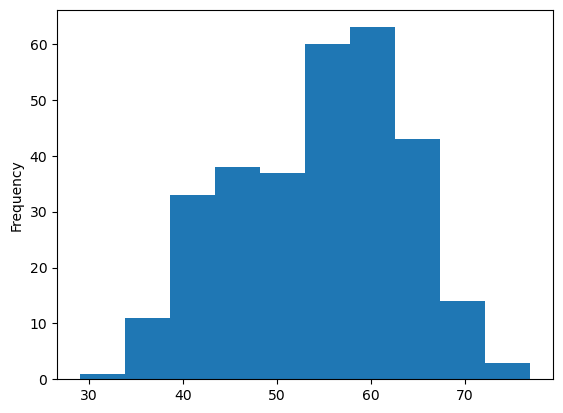

In [22]:
data.age.plot.hist()

Mostly all the columns have near to normal distribution. 

In [23]:
## Let's see how heart disease is related with frequency of chest pain  
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


- **cp** – Chest pain type  
  - `0`: Typical angina – chest pain related to decreased blood supply to the heart  
  - `1`: Atypical angina – chest pain not related to the heart  
  - `2`: Non-anginal pain – typically esophageal spasms (non-heart related)  
  - `3`: Asymptomatic – chest pain not showing signs of disease  

So from the cross tab result we can see that, there are 4 types of Chest pains which related to the people who have heart disease or not.


- Let's make the cross tab more visual,

Text(0, 0.5, 'Amount')

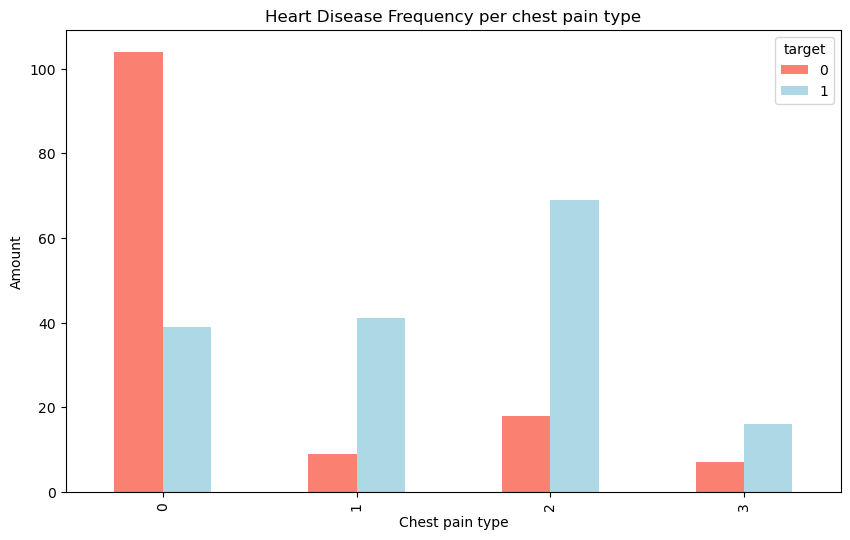

In [24]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")